In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from numpy.random import normal, multivariate_normal
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def generate_X(n):
    X = np.random.uniform(0,1,n)
    return X

def generate_DA(n, X, model='1'):
    if model == '1':
        D = np.random.choice([0,1],size=n,p=[.5,.5])
        A = np.random.choice([0,1],size=n,p=[.5,.5])
    elif model == '2':
        idx = np.argsort(X).reshape(-1,2)
        chosen_col = np.random.choice([0,1],size=idx.shape[0],p=[.5,.5])
        idx_treated = idx[np.arange(idx.shape[0]), chosen_col]
        D = np.zeros(n)
        D[idx_treated] = 1
        A = np.random.choice([0,1],size=n,p=[.5,.5])
    elif model == '3':
        idx = np.argsort(X).reshape(-1,2)
        chosen_col = np.random.choice([0,1],size=idx.shape[0],p=[.5,.5])
        idx_treated = idx[np.arange(idx.shape[0]), chosen_col]
        A = np.zeros(n)
        A[idx_treated] = 1
        D = np.random.choice([0,1],size=n,p=[.5,.5])
    elif model == '4':
        idx = np.argsort(X).reshape(-1,2)
        chosen_col_D = np.random.choice([0,1],size=idx.shape[0],p=[.5,.5])
        chosen_col_A = np.random.choice([0,1],size=idx.shape[0],p=[.5,.5])
        idx_treated_D = idx[np.arange(idx.shape[0]), chosen_col_D]
        idx_treated_A = idx[np.arange(idx.shape[0]), chosen_col_A]
        D = np.zeros(n)
        D[idx_treated_D] = 1
        A = np.zeros(n)
        A[idx_treated_A] = 1
    elif model == '5':
        idx = np.argsort(X).reshape(-1,4)
        df = pd.DataFrame(idx)
        idx = df.apply(lambda x:np.random.shuffle(x) or x, axis=1).to_numpy()
        D, A = np.zeros(n), np.zeros(n)
        D[idx[:,2]] = 1
        D[idx[:,3]] = 1
        A[idx[:,1]] = 1
        A[idx[:,3]] = 1
    else:
        raise ValueError('Model is not valid.')
        
    return D, A

def generate_Y(n, X, D, A, model='1'):
    Y = {'0,0':np.zeros(n),
        '0,1':np.zeros(n),
        '1,0':np.zeros(n),
        '1,1':np.zeros(n)}
    eps = np.random.normal(0, 0.1, size=n)
    
    if model == '1':
        for k in Y.keys():
            Y[k] = (X - .5)
    elif model == '2':
        Y['0,1'] = (X - .5)
        Y['1,1'] = (X - .5)
        Y['0,0'] = -(X - .5)
        Y['1,0'] = -(X - .5)
    elif model == '3':
        Y['0,1'] = np.sin(X - .5)
        Y['1,1'] = np.sin(X - .5)
        Y['0,0'] = np.sin(-(X - .5))
        Y['1,0'] = np.sin(-(X - .5))
    elif model == '4':
        Y['1,1'] = np.sin(X - .5) + X**2 - 1/3
        Y['1,0'] = np.sin(-(X - .5)) + X**2 - 1/3
        Y['0,1'] = np.sin(X - .5)
        Y['0,0'] = np.sin(-(X - .5))
    else:
        raise ValueError('Model is not valid.')

    for k in Y.keys():
        Y[k] += eps
    
    Yobs = np.zeros(n)
    Yobs[(D==0) & (A==0)] = Y['0,0'][(D==0) & (A==0)]
    Yobs[(D==0) & (A==1)] = Y['0,1'][(D==0) & (A==1)]
    Yobs[(D==1) & (A==0)] = Y['1,0'][(D==1) & (A==0)]
    Yobs[(D==1) & (A==1)] = Y['1,1'][(D==1) & (A==1)]
    
    return Y, Yobs

def DiM(Y, D, A):
    mu00 = np.mean(Y[(D==0) & (A==0)])
    mu01 = np.mean(Y[(D==0) & (A==1)])
    mu10 = np.mean(Y[(D==1) & (A==0)])
    mu11 = np.mean(Y[(D==1) & (A==1)])
    
    tau1 = mu11 - mu01
    tau0 = mu10 - mu00
    return tau1, tau0

In [2]:
def plot_hist(tau1, tau0):
    
    fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 5))
    ax_1.hist(tau1, color="b")
    ax_1.set_xlabel("tau1")
    ax_1.set_ylabel("Count")
    ax_1.axvline(x=np.mean(tau1), ymin=0, ymax=3000, color="k", linestyle="--")

    ax_2.hist(tau0, color="r")
    ax_2.set_xlabel("tau0")
    ax_2.set_ylabel("Count")
    ax_2.axvline(x=np.mean(tau0), ymin=0, ymax=3000, color="k", linestyle="--")
    return fig

def simulation(n, modelY='1', modelDA='1', ntrials=1000):
    tau1s, tau0s = np.zeros(ntrials), np.zeros(ntrials)
    for i in range(ntrials):
        X = generate_X(n)
        D, A = generate_DA(n, X, model=modelDA)
        Y, Yobs = generate_Y(n, X, D, A, model=modelY)
        tau1, tau0 = DiM(Yobs,D,A)
        tau1s[i] = tau1
        tau0s[i] = tau0
    return tau1s, tau0s

ModelY=1, ModelDA=1
Variance of tau1s 0.0007597106448083168 and tau0s 0.0007763373587320218


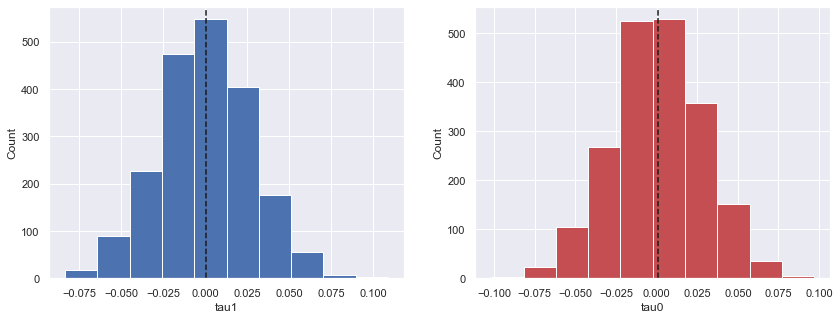

ModelY=1, ModelDA=2
Variance of tau1s 0.0004108470844246163 and tau0s 0.00039957373641604155


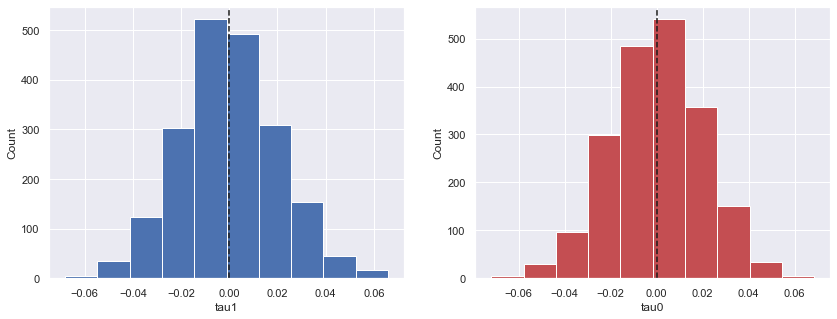

ModelY=1, ModelDA=3
Variance of tau1s 0.000743823371866732 and tau0s 0.0007647300609170003


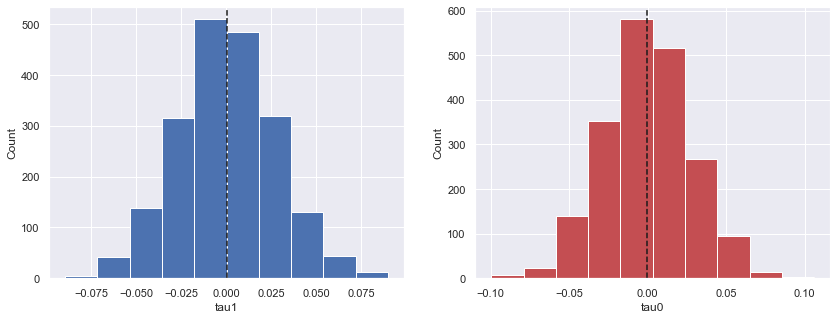

ModelY=1, ModelDA=4
Variance of tau1s 0.0007340650415955627 and tau0s 0.0007502432582268451


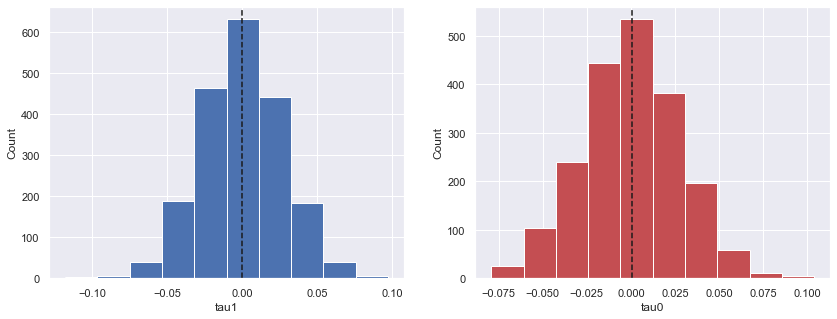

ModelY=1, ModelDA=5
Variance of tau1s 8.245373097242658e-05 and tau0s 7.808864298863766e-05


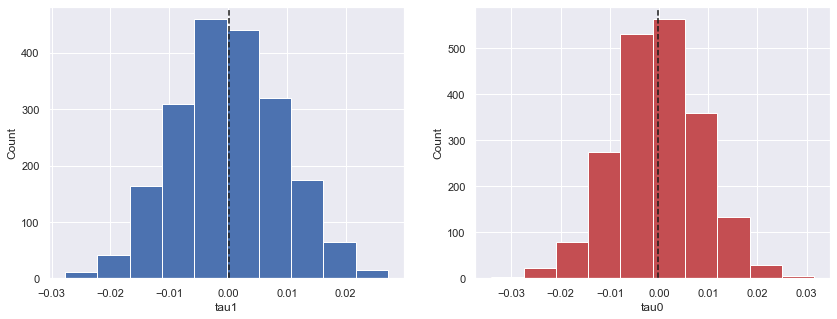

In [3]:
for i in range(5):
    tau1s, tau0s = simulation(1000, modelDA=str(i+1), ntrials=2000)
    print('ModelY=1, ModelDA={}'.format(i+1))
    print('Variance of tau1s {} and tau0s {}'.format(np.var(tau1s), np.var(tau0s)))
    fig = plot_hist(tau1s, tau0s)
    plt.show()

ModelY=2, ModelDA=1
Variance of tau1s 0.0007457245674419097 and tau0s 0.0007957245531073209


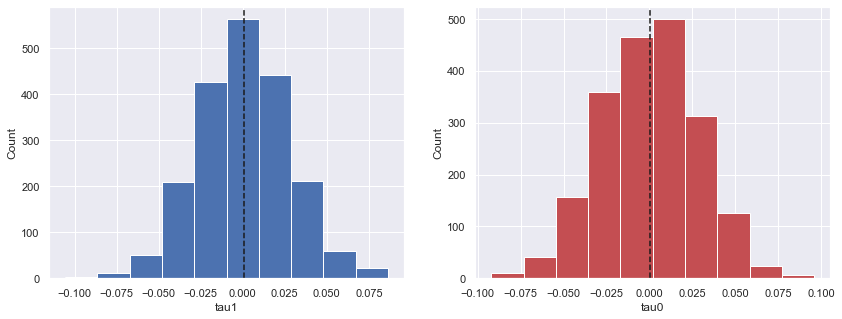

ModelY=2, ModelDA=2
Variance of tau1s 0.0004051528021889996 and tau0s 0.00039471148638982827


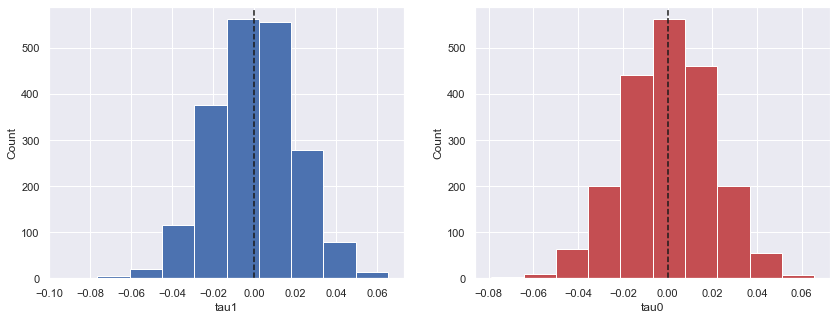

ModelY=2, ModelDA=3
Variance of tau1s 0.0008003764235011635 and tau0s 0.0007478732553899243


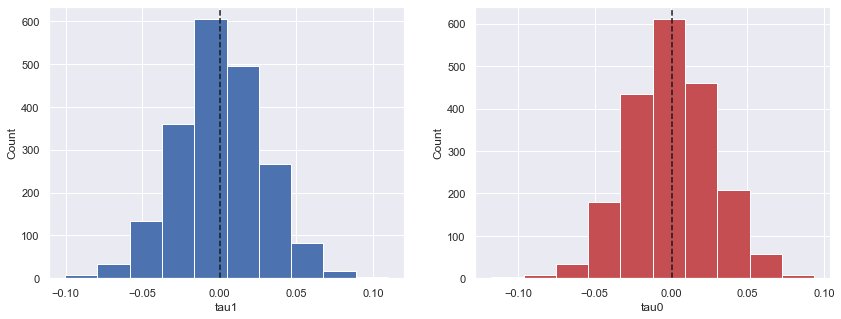

ModelY=2, ModelDA=4
Variance of tau1s 0.0007836199730998705 and tau0s 0.0007754459815266067


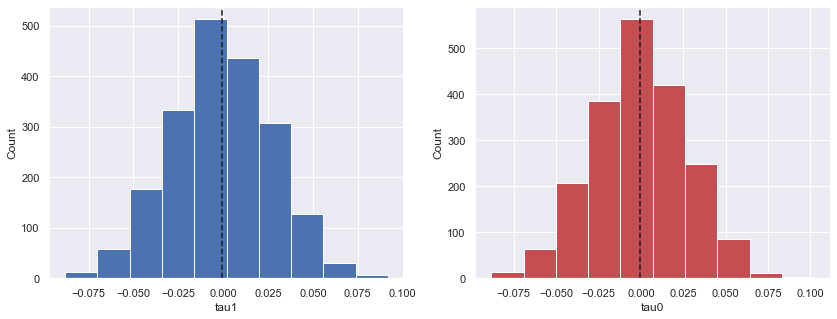

ModelY=2, ModelDA=5
Variance of tau1s 7.9162742796934e-05 and tau0s 7.750630421796587e-05


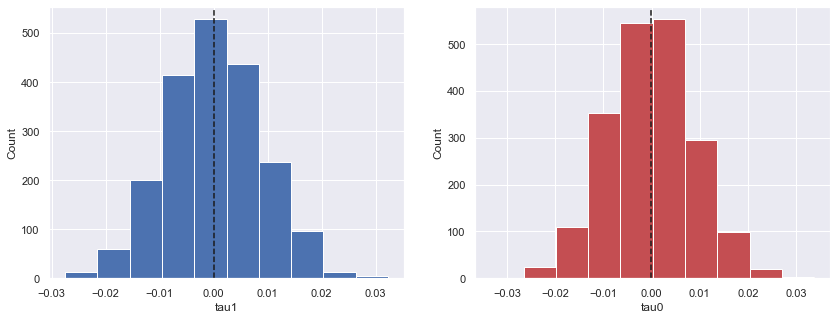

In [4]:
for i in range(5):
    tau1s, tau0s = simulation(1000, modelY='2', modelDA=str(i+1), ntrials=2000)
    print('ModelY=2, ModelDA={}'.format(i+1))
    print('Variance of tau1s {} and tau0s {}'.format(np.var(tau1s), np.var(tau0s)))
    fig = plot_hist(tau1s, tau0s)
    plt.show()

ModelY=3, ModelDA=1
Variance of tau1s 0.0006997117435515588 and tau0s 0.000730947984377305


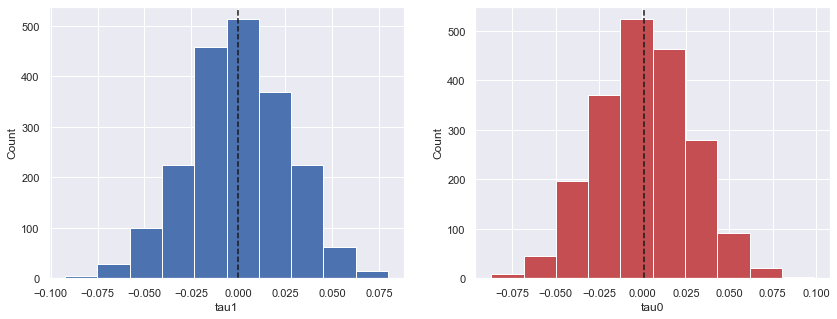

ModelY=3, ModelDA=2
Variance of tau1s 0.00040218070179760254 and tau0s 0.00041462338021504817


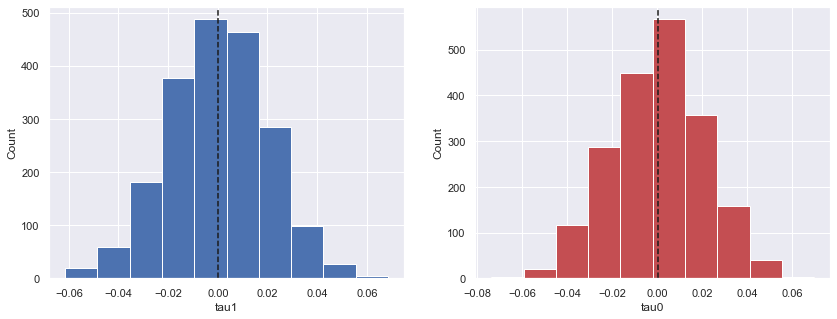

ModelY=3, ModelDA=3
Variance of tau1s 0.0006757528397846504 and tau0s 0.0006749974093230427


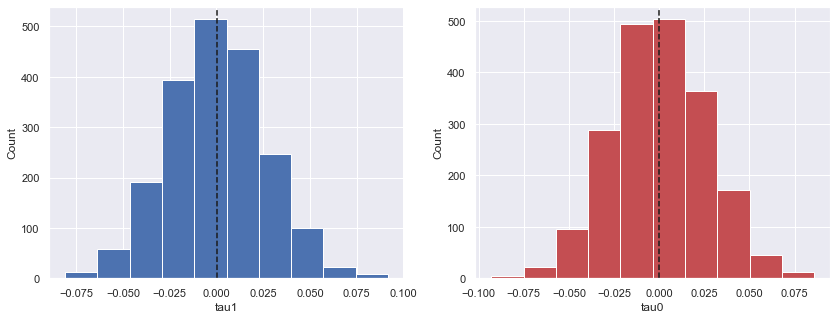

ModelY=3, ModelDA=4
Variance of tau1s 0.0006792079744994057 and tau0s 0.0006745274371674381


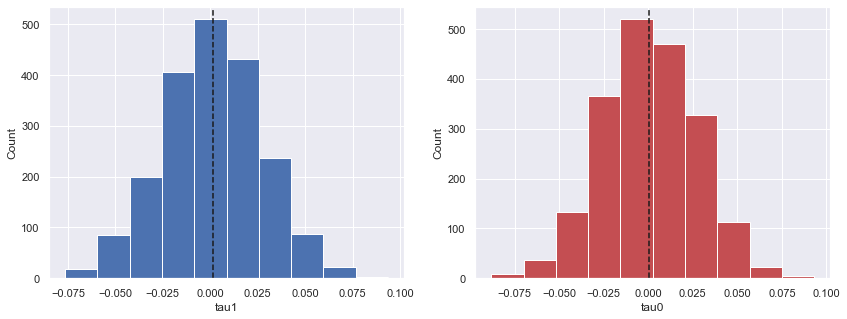

ModelY=3, ModelDA=5
Variance of tau1s 8.071105047361396e-05 and tau0s 7.811325929210507e-05


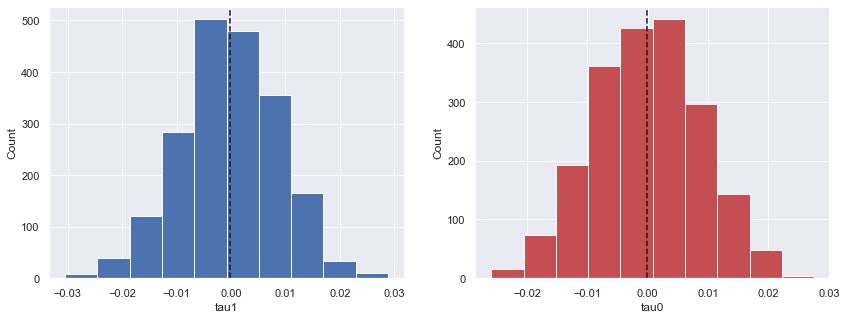

In [5]:
for i in range(5):
    tau1s, tau0s = simulation(1000, modelY='3', modelDA=str(i+1), ntrials=2000)
    print('ModelY=3, ModelDA={}'.format(i+1))
    print('Variance of tau1s {} and tau0s {}'.format(np.var(tau1s), np.var(tau0s)))
    fig = plot_hist(tau1s, tau0s)
    plt.show()

ModelY=4, ModelDA=1
Variance of tau1s 0.0017903436148877308 and tau0s 0.00043605221869814556


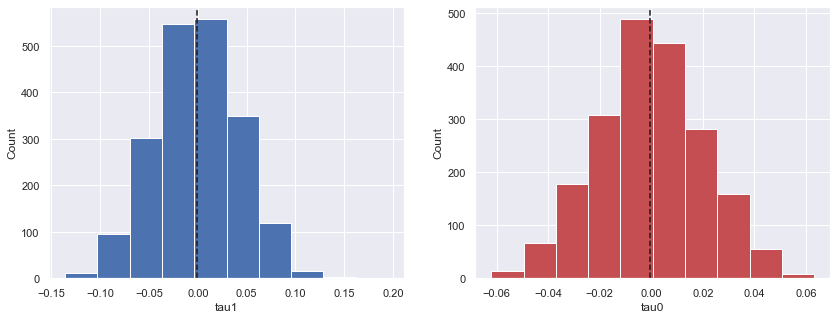

ModelY=4, ModelDA=2
Variance of tau1s 0.0010630643615138764 and tau0s 0.0003385817753272726


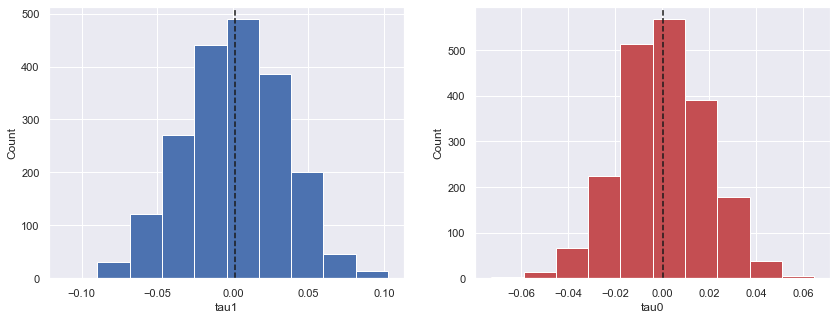

ModelY=4, ModelDA=3
Variance of tau1s 0.0016135842256111415 and tau0s 0.0003425010073356822


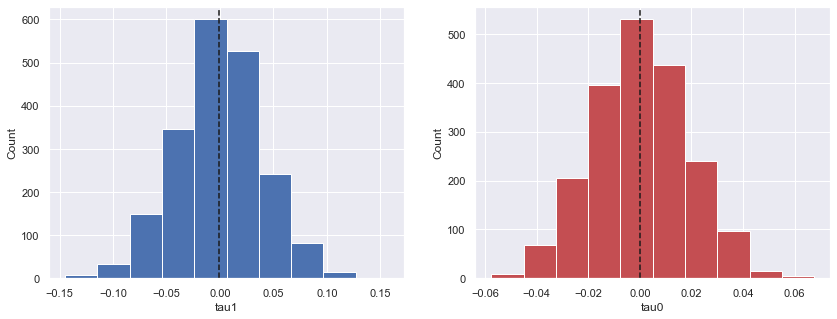

ModelY=4, ModelDA=4
Variance of tau1s 0.0017151560305223481 and tau0s 0.00034024212873788606


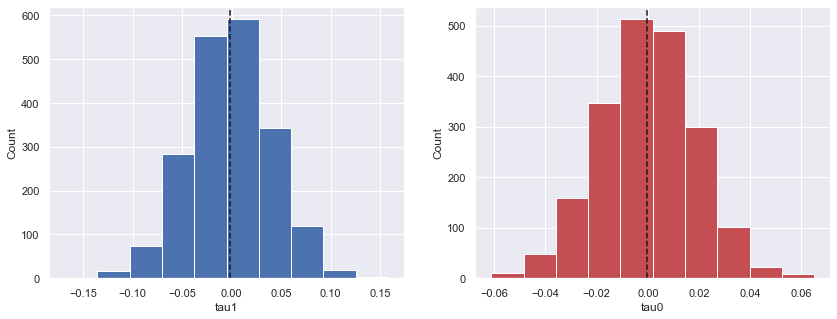

ModelY=4, ModelDA=5
Variance of tau1s 0.00017270387357462712 and tau0s 0.0001787725717594763


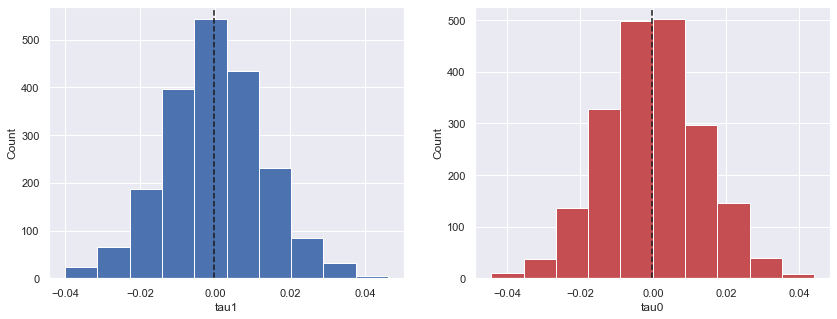

In [6]:
for i in range(5):
    tau1s, tau0s = simulation(1000, modelY='4', modelDA=str(i+1), ntrials=2000)
    print('ModelY=4, ModelDA={}'.format(i+1))
    print('Variance of tau1s {} and tau0s {}'.format(np.var(tau1s), np.var(tau0s)))
    fig = plot_hist(tau1s, tau0s)
    plt.show()

In [7]:
for i in range(4):
    print("ModelY={}".format(i+1))
    mse = np.zeros((5,3))
    for j in range(5):
        tau1s, tau0s = simulation(1000, modelY=str(i+1), modelDA=str(j+1), ntrials=2000)
        theta = .5*tau1s + .5*tau0s
        mse[j,0] = np.mean(theta**2)
        mse[j,1] = np.mean(tau1s**2)
        mse[j,2] = np.mean(tau0s**2)
    mse = mse/mse[4]
    print(mse.T)
    print(" ")

ModelY=1
[[9.33937048 1.01703048 9.21667279 1.01955848 1.        ]
 [9.32500245 5.07421045 9.2418573  8.8985551  1.        ]
 [9.4905772  5.58723825 9.27725699 9.46072629 1.        ]]
 
ModelY=2
[[ 9.97752508 10.31806211  9.11793997 18.97640816  1.        ]
 [ 9.55308507  5.71183309  9.6389455   9.94962444  1.        ]
 [ 9.5415824   5.40053113  9.63896983  9.65179932  1.        ]]
 
ModelY=3
[[ 8.79407263  8.74950811  9.30239871 17.477403    1.        ]
 [ 8.67989621  4.7953594   9.26733968  8.96128349  1.        ]
 [ 9.21215948  4.86761432  9.37636882  9.40677961  1.        ]]
 
ModelY=4
[[4.05370096 3.29984841 3.98866162 5.81698154 1.        ]
 [9.91050581 5.60338863 9.34948772 9.44242471 1.        ]
 [2.57850155 1.94572881 1.9250372  1.93548201 1.        ]]
 
